In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

2023-12-18 09:46:36.947722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 09:46:37.096155: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 09:46:38.035894: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.3/lib64
2023-12-18 09:46:38.035993: W te

In [7]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
with tf.compat.v1.Session(config=config) as sess:

    # 메모리 40% 할당
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.9
    sess = tf.compat.v1.Session(config=config)

2023-12-15 22:43:23.528795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78307 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0
2023-12-15 22:43:23.536278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78307 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [1]:
import pickle

with open('./Pretraning_data/ZINC_10M_data','rb') as file:
    train = pickle.load(file)

In [8]:
train[1]

NameError: name 'train' is not defined

In [6]:
from SmilesPE import tokenizer

tokenizer.atomwise_tokenizer(train[1])

['O',
 '=',
 'C',
 '(',
 'N',
 'C',
 '(',
 '=',
 'O',
 ')',
 'c',
 '1',
 'c',
 'c',
 'c',
 'c',
 '(',
 'F',
 ')',
 'c',
 '1',
 ')',
 'O',
 '[C@H]',
 '1',
 'C',
 'C',
 'S',
 '(',
 '=',
 'O',
 ')',
 '(',
 '=',
 'O',
 ')',
 'C',
 '1']

In [2]:
from rdkit import Chem
from tqdm import tqdm
def Chem_generator(smiles):
    res_list = []
    for i in tqdm(smiles):
        mol = Chem.MolFromSmiles(i)
        temp = []
        index = 0
        while(len(set(temp))!=4 and index != 100):
            index+=1
            temp.append(Chem.MolToSmiles(mol,doRandom=True))
        res_list+=list(set(temp))
    return res_list

In [3]:
train_1 = Chem_generator(train)

  0%|          | 432/12525050 [00:00<1:37:37, 2138.06it/s]

100%|██████████| 12525050/12525050 [1:14:21<00:00, 2807.07it/s]


In [4]:
from tdc.single_pred import Tox
from Module import RDK as rk
import atomInSmiles
from Module import Fine_tune
from SmilesPE import tokenizer

2023-12-20 18:31:22.306251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 18:31:22.447877: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-20 18:31:25.148862: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.3/lib64
2023-12-20 18:31:25.148947: W te

In [5]:
from multiprocessing import Pool
from tqdm import tqdm
from multiprocessing import Process, Value, Array
from multiprocessing import Process,Manager,current_process
from Module import RDK as rk
import atomInSmiles 
from SmilesPE import tokenizer

train_set = []
for i in tqdm(train_1):
    train_set.append(tokenizer.atomwise_tokenizer(i))


  0%|          | 0/50100189 [00:00<?, ?it/s]

100%|██████████| 50100189/50100189 [08:07<00:00, 102816.16it/s]


Text(0, 0.5, 'counts')

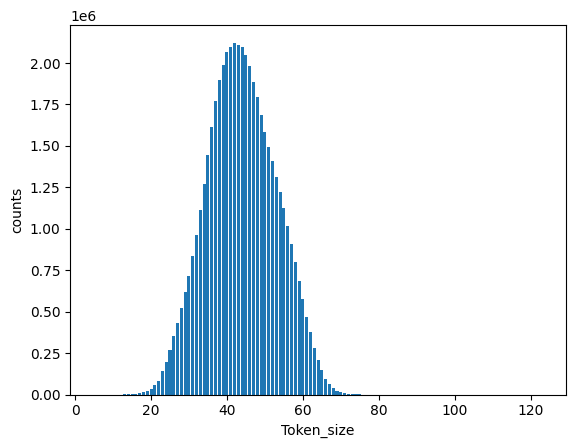

In [6]:
import matplotlib.pyplot as plt
length_list = {}


for index,i in enumerate(train_set):
    try:
        length_list[len(i)]=length_list[len(i)]+1
    except:
        length_list[len(i)] = 1
    
plt.bar(length_list.keys(),length_list.values())
plt.xlabel(xlabel='Token_size')
plt.ylabel('counts')    

In [7]:
temp_dict = {}
for i in train_set:
    for j in i:
        try:
            temp_dict[j] = temp_dict[j] + 1
        except:
            temp_dict[j] = 1
remove_dict = {}
for i in temp_dict.keys():
    if temp_dict[i]<50:
        print(i,temp_dict[i])
        remove_dict[i] = 1

remove_list = []
for index,i in enumerate(train_set):
    for j in i:
        try:
            remove_dict[j]
            remove_list.append(index)
            break
        except:
            continue

remove_list.sort(reverse=True)

[P@H+] 48
[P@@H+] 48
9 12
%10 4
[CH] 16
p 16
[CH2] 24
[Si-] 4
[P@+] 33
[P@@+] 31
[NH] 8
[17O] 12
[p+] 4


In [8]:
for i in remove_list:
    train_set.pop(i)
print(len(train_set))

50099943


In [12]:
import pickle
with open('./Pretraning_data/Random_ZINC_50M_SMILE_tokken.pkl','rb') as file:
    train_set = pickle.load(file)

In [13]:
train_set

[['C',
  'n',
  '1',
  'c',
  'c',
  '(',
  'C',
  '(',
  'N',
  '2',
  'C',
  'C',
  'C',
  '[C@H]',
  '2',
  'c',
  '2',
  '[nH]',
  'n',
  'c',
  'c',
  '2',
  'S',
  '(',
  'C',
  ')',
  '(',
  '=',
  'O',
  ')',
  '=',
  'O',
  ')',
  '=',
  'O',
  ')',
  'c',
  'n',
  '1'],
 ['n',
  '1',
  'c',
  'c',
  '(',
  'S',
  '(',
  '=',
  'O',
  ')',
  '(',
  '=',
  'O',
  ')',
  'C',
  ')',
  'c',
  '(',
  '[C@@H]',
  '2',
  'C',
  'C',
  'C',
  'N',
  '2',
  'C',
  '(',
  'c',
  '2',
  'c',
  'n',
  'n',
  '(',
  'c',
  '2',
  ')',
  'C',
  ')',
  '=',
  'O',
  ')',
  '[nH]',
  '1'],
 ['S',
  '(',
  'c',
  '1',
  'c',
  '(',
  '[nH]',
  'n',
  'c',
  '1',
  ')',
  '[C@H]',
  '1',
  'N',
  '(',
  'C',
  '(',
  '=',
  'O',
  ')',
  'c',
  '2',
  'c',
  'n',
  'n',
  '(',
  'c',
  '2',
  ')',
  'C',
  ')',
  'C',
  'C',
  'C',
  '1',
  ')',
  '(',
  '=',
  'O',
  ')',
  '(',
  'C',
  ')',
  '=',
  'O'],
 ['O',
  '=',
  'S',
  '(',
  'c',
  '1',
  'c',
  '(',
  '[nH]',
  'n',
  'c',
  '1',

In [14]:
import pickle
molecule_dictionary = {'<start>':1,'<end>':2,'<unknown1>':3,'<unknown2>':4,'<unknown3>':5,'<unknow4>':6,'<unknown5>':7}

for molecule in train_set:
    for atom in molecule:
        try:
            molecule_dictionary[atom]
        except:
            molecule_dictionary[atom] = len(molecule_dictionary)+1
with open('./BERT/SMiles/1M_random_ZINC_word2index.pkl','wb') as file:
    pickle.dump(molecule_dictionary,file)
len(molecule_dictionary)

FileNotFoundError: [Errno 2] No such file or directory: './BERT/SMiles/1M_random_ZINC_word2index.pkl'

In [15]:
with open('./BERT/SMILE/1M_random_ZINC_word2index.pkl','wb') as file:
    pickle.dump(molecule_dictionary,file)
len(molecule_dictionary)

71

: 

In [ ]:
from tqdm import tqdm
import numpy as np 

def word_to_index(train_set,dict):
    result = []
    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            temp_list.append(dict[atom])
        while len(temp_list)!=200:
            temp_list.append(0)
        result.append(temp_list)
    return result
embedding_word = word_to_index(train_set,molecule_dictionary)   
embedding_word = np.array(embedding_word)

  0%|          | 0/50099943 [00:00<?, ?it/s]

100%|██████████| 50099943/50099943 [13:20<00:00, 62602.78it/s] 


In [74]:
from tdc.single_pred import Tox
from Module import RDK
import atomInSmiles

def word_to_index(train_set,dict):
    result = []
    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            temp_list.append(dict[atom])
        while len(temp_list)!=200:
            temp_list.append(0)
        result.append(temp_list)
    return result
train_val,tox_info = Tox(name = 'AMES').get_data(format = 'DeepPurpose')
train_set_val = []

train_val = Chem_generator(train_val[:5000])


for i in train_val:
    train_set_val.append(tokenizer.atomwise_tokenizer(i))
val_remove_list = []
for index,i in enumerate(train_set_val):
    for j in i:
        try:
            molecule_dictionary[j]
        except:
            val_remove_list.append(index)
            break
val_remove_list.sort(reverse=True)

for i in val_remove_list:
    train_set_val.pop(i)

embedding_word_val = word_to_index(train_set_val,molecule_dictionary)   
embedding_word_val = np.array(embedding_word_val)

Found local copy...
Loading...
Done!
100%|██████████| 19939/19939 [00:00<00:00, 58816.62it/s]


In [75]:
embedding_word_val

array([[ 1, 41, 11, ...,  0,  0,  0],
       [ 1, 12, 13, ...,  0,  0,  0],
       [ 1, 12, 13, ...,  0,  0,  0],
       ...,
       [ 1, 12, 13, ...,  0,  0,  0],
       [ 1, 12, 13, ...,  0,  0,  0],
       [ 1, 19, 13, ...,  0,  0,  0]])

In [76]:
import random
max = 16
mask_input_val = []
for j in tqdm(train_set_val):
        value = []
        number = int(len(j)*0.15)
        if number>max:
                max = number
        if number == 0:
                number = 1
        value += random.sample(range(1,len(j)),number)
        mask_input_val.append(value)
        
        
for j in mask_input_val:
        while(len(j)<max):
                j.append(-1)


random_value_val = embedding_word_val.copy()        
for _,index in enumerate(mask_input_val):
        for j in index:
                if j != -1:
                        prob = np.random.rand(1)[0]
                        if prob < 0.8:
                                random_value_val[_][j] = 0
                        elif prob > 0.9:
                                temp1 = random.sample(range(0,301),1)[0]
                                random_value_val[_][j] = temp1
                                
output_val = tf.multiply(tf.reduce_sum(tf.one_hot(mask_input_val,200),axis=1),embedding_word_val)

  0%|          | 0/19939 [00:00<?, ?it/s]

100%|██████████| 19939/19939 [00:00<00:00, 193468.47it/s]


In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import *
early_stopping_cb = EarlyStopping(patience=6, monitor='loss',restore_best_weights=True)

In [20]:
def custom_loss(y_true, y_pred):
    output = tf.one_hot(tf.cast(tf.boolean_mask(y_true,tf.cast(y_true,bool)),tf.int32),len(molecule_dictionary))
    loss = tf.keras.losses.CategoricalCrossentropy()(output,y_pred)
    return loss

In [21]:
def Custom_metric(y_true,y_pred):
    predictions = tf.argmax(y_pred,axis=1)
    true = tf.boolean_mask(y_true,tf.cast(y_true,bool))
    return  tf.metrics.Accuracy()(predictions,true)
def Mask_acc(y_true, y_pred):
    score = tf.py_function(func=Custom_metric, inp=[y_true, y_pred], Tout=tf.float32,  name='Custom_acc') 
    return score

In [53]:
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim):
        super(BERT, self).__init__()
        self.transformer = TransformerBlock(emb_dim,num_heads,ff_dim)
        
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(len(molecule_dictionary),activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
        
        hidden = self.embedding(inputs)
        for i in range(8):
            hidden = self.transformer(hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = tf.boolean_mask(output,boolean_mask)
            output = self.dense(output)
            output = layers.Dropout(0.1)(output)
            output = self.classify(output)
            return output
        else:
            return hidden

In [54]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=1, limit=maxlen+1, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Embedding
inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT(256,6,1024)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_6 (BERT)                  (None, 71)           3133591     ['input_13[0][0]',               
                                                                  'input_14[0][0]']               
                                                                                                  
Total params: 3,133,591
Trainable params: 3,133,591
Non-trainable params: 0
________________

In [62]:
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

In [63]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=2000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.batch_count
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    self.batch_count += 1
    step = float(step+1)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(1000.) * tf.math.minimum(arg1, arg2)

In [64]:
class CustomLearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, warmup_steps=4000):
        super(CustomLearningRateScheduler, self).__init__()
        self.warmup_steps = warmup_steps
        self.step = tf.Variable(0, trainable=False)

    def __call__(self, step):
        self.step.assign_add(1)  # 각 배치가 지나갈 때마다 step 증가
        lr = tf.cond(
            self.step <= self.warmup_steps,
            lambda: (1e-4 - 1e-9) / self.warmup_steps * tf.cast(self.step, tf.float32) + 1e-9,
            lambda: 0.5 * (1e-4 + 1e-9) * (self.warmup_steps ** 0.5) / (tf.cast(self.step, tf.float32) ** 0.5)
        )
        return lr

In [65]:
lr = CustomLearningRateScheduler()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)

In [ ]:
model.load_weights('./BERT/SMILE/Random_ZINC_L_model_weights.h5')

In [66]:

import random
size = 300000
for k in range(1):
        for i in range(0,int(len(embedding_word)/size)):
                if k == 1:
                        i = i
                if i == int(len(embedding_word)/size):
                        break
                if i <80:
                        lr = (1e-4-1e-6)*(i)/80 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(80)/np.sqrt(i)
                optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                for j in tqdm(train_set[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                
                
                
                
                
                inputs1 = embedding_word[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 0
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,301),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 20 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=256,callbacks = [early_stopping_cb],validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=256,callbacks = [early_stopping_cb])
                        print(model.optimizer.lr)
                        model.save_weights('./BERT/SMILE/Random_ZINC_L_model_weights.h5')

 12%|█▏        | 35636/300000 [00:00<00:01, 181733.93it/s]

100%|██████████| 300000/300000 [00:01<00:00, 200310.55it/s]


This is 0 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 5.7488 - Mask_acc: 0.2244
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-06>


100%|██████████| 300000/300000 [00:01<00:00, 206949.15it/s]


This is 1 number step
1172/1172 [==============================] - 373s 313ms/step - loss: 4.8003 - Mask_acc: 0.3004
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.2375e-06>


100%|██████████| 300000/300000 [00:01<00:00, 194139.43it/s]


This is 2 number step
1172/1172 [==============================] - 373s 313ms/step - loss: 4.2326 - Mask_acc: 0.3097
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.475e-06>


100%|██████████| 300000/300000 [00:01<00:00, 196593.10it/s]


This is 3 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 3.6172 - Mask_acc: 0.3513
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.7125e-06>


100%|██████████| 300000/300000 [00:01<00:00, 194324.29it/s]


This is 4 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 3.2055 - Mask_acc: 0.3243
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.95e-06>


100%|██████████| 300000/300000 [00:01<00:00, 207860.08it/s]


This is 5 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 2.7720 - Mask_acc: 0.3331
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.1875e-06>


100%|██████████| 300000/300000 [00:28<00:00, 10603.68it/s] 


This is 6 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 2.4518 - Mask_acc: 0.3303
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.425e-06>


100%|██████████| 300000/300000 [00:01<00:00, 205152.47it/s]


This is 7 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 2.2402 - Mask_acc: 0.3550
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.6625e-06>


100%|██████████| 300000/300000 [00:01<00:00, 188242.33it/s]


This is 8 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 2.2022 - Mask_acc: 0.3580
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.09e-05>


100%|██████████| 300000/300000 [00:01<00:00, 185625.00it/s]


This is 9 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 2.1665 - Mask_acc: 0.3675
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.21375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 206300.55it/s]


This is 10 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 2.0591 - Mask_acc: 0.3820
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.3375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 199402.19it/s]


This is 11 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 2.0762 - Mask_acc: 0.3797
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.46125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 195788.14it/s]


This is 12 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 2.1019 - Mask_acc: 0.3665
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.585e-05>


100%|██████████| 300000/300000 [00:01<00:00, 183889.08it/s]


This is 13 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 2.0797 - Mask_acc: 0.3550
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.70875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 197297.12it/s]


This is 14 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 2.0714 - Mask_acc: 0.3741
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.8325e-05>


100%|██████████| 300000/300000 [00:01<00:00, 196022.17it/s]


This is 15 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 2.0572 - Mask_acc: 0.3813
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.95625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 188588.40it/s]


This is 16 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 2.0594 - Mask_acc: 0.3724
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.08e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191493.39it/s]


This is 17 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 2.0231 - Mask_acc: 0.3744
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.20375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 207283.97it/s]


This is 18 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 2.0232 - Mask_acc: 0.3890
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.3275e-05>


100%|██████████| 300000/300000 [00:01<00:00, 188335.03it/s]


This is 19 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.9664 - Mask_acc: 0.3925
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.45125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 204843.78it/s]


This is 20 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 1.9619 - Mask_acc: 0.4201
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.575e-05>


100%|██████████| 300000/300000 [00:01<00:00, 200277.36it/s]


This is 21 number step
1172/1172 [==============================] - 369s 310ms/step - loss: 1.8862 - Mask_acc: 0.4457
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.69875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 202830.92it/s]


This is 22 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 1.7998 - Mask_acc: 0.4802
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.8225e-05>


100%|██████████| 300000/300000 [00:01<00:00, 208243.09it/s]


This is 23 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 1.6820 - Mask_acc: 0.5125
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.94625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 201679.52it/s]


This is 24 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.6420 - Mask_acc: 0.5266
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.07e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191282.14it/s]


This is 25 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.5837 - Mask_acc: 0.5459
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.19375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 202272.58it/s]


This is 26 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.5038 - Mask_acc: 0.5788
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.3175e-05>


100%|██████████| 300000/300000 [00:01<00:00, 201724.20it/s]


This is 27 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.4553 - Mask_acc: 0.5925
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.44125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 199837.09it/s]


This is 28 number step
1172/1172 [==============================] - 372s 313ms/step - loss: 1.4229 - Mask_acc: 0.5986
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.565e-05>


100%|██████████| 300000/300000 [00:01<00:00, 193469.41it/s]


This is 29 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 1.3784 - Mask_acc: 0.6124
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.68875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 202048.37it/s]


This is 30 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 1.3568 - Mask_acc: 0.6184
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.8125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 197895.18it/s]


This is 31 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.3421 - Mask_acc: 0.6237
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=3.93625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 186765.29it/s]


This is 32 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.2683 - Mask_acc: 0.6430
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.06e-05>


100%|██████████| 300000/300000 [00:01<00:00, 190267.83it/s]


This is 33 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.1808 - Mask_acc: 0.6551
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.18375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191660.29it/s]


This is 34 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.2615 - Mask_acc: 0.6460
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.3075e-05>


100%|██████████| 300000/300000 [00:01<00:00, 194027.97it/s]


This is 35 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.2243 - Mask_acc: 0.6504
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.43125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 189924.47it/s]


This is 36 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 1.1883 - Mask_acc: 0.6680
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.555e-05>


100%|██████████| 300000/300000 [00:01<00:00, 184723.17it/s]


This is 37 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 1.1147 - Mask_acc: 0.6844
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.67875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 196649.57it/s]


This is 38 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 1.1335 - Mask_acc: 0.6839
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.8025e-05>


100%|██████████| 300000/300000 [00:19<00:00, 15306.68it/s] 


This is 39 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 1.1137 - Mask_acc: 0.6845
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=4.92625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 176733.59it/s]


This is 40 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.0423 - Mask_acc: 0.7020
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.05e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191393.43it/s]


This is 41 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.0609 - Mask_acc: 0.7030
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.17375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 189669.93it/s]


This is 42 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 1.0300 - Mask_acc: 0.7037
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.2975e-05>


100%|██████████| 300000/300000 [00:01<00:00, 183994.92it/s]


This is 43 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 1.0498 - Mask_acc: 0.6995
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.42125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 177830.99it/s]


This is 44 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 1.0236 - Mask_acc: 0.7059
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.545e-05>


100%|██████████| 300000/300000 [00:01<00:00, 181506.41it/s]


This is 45 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.9636 - Mask_acc: 0.7246
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.66875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 185372.13it/s]


This is 46 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.9609 - Mask_acc: 0.7256
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.7925e-05>


100%|██████████| 300000/300000 [00:01<00:00, 181243.32it/s]


This is 47 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.9456 - Mask_acc: 0.7274
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.91625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 225315.28it/s]


This is 48 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.9568 - Mask_acc: 0.7215
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=6.04e-05>


100%|██████████| 300000/300000 [00:01<00:00, 222488.41it/s]


This is 49 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.9639 - Mask_acc: 0.7191
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=6.16375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 207435.31it/s]


This is 50 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.9211 - Mask_acc: 0.7276
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=6.2875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 204514.70it/s]


This is 51 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.9747 - Mask_acc: 0.7180
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=6.41125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191665.84it/s]


This is 52 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.9784 - Mask_acc: 0.7157
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=6.535e-05>


100%|██████████| 300000/300000 [00:01<00:00, 196096.19it/s]


This is 53 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.8844 - Mask_acc: 0.7333
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=6.65875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 184599.51it/s]


This is 54 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.8816 - Mask_acc: 0.7369
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=6.7825e-05>


100%|██████████| 300000/300000 [00:01<00:00, 211738.75it/s]


This is 55 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.9531 - Mask_acc: 0.7256
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=6.90625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 202364.74it/s]


This is 56 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.9440 - Mask_acc: 0.7248
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.03e-05>


100%|██████████| 300000/300000 [00:01<00:00, 184821.17it/s]


This is 57 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.8913 - Mask_acc: 0.7404
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.15375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 180576.55it/s]


This is 58 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.8292 - Mask_acc: 0.7529
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.2775e-05>


100%|██████████| 300000/300000 [00:01<00:00, 206556.71it/s]


This is 59 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.8542 - Mask_acc: 0.7548
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.40125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 201336.77it/s]


This is 60 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.9465 - Mask_acc: 0.7232
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.525e-05>


100%|██████████| 300000/300000 [00:01<00:00, 188477.38it/s]


This is 61 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.8689 - Mask_acc: 0.7399
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.64875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 168861.47it/s]


This is 62 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.8296 - Mask_acc: 0.7539
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.7725e-05>


100%|██████████| 300000/300000 [00:01<00:00, 196262.49it/s]


This is 63 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.8630 - Mask_acc: 0.7449
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.89625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 198598.61it/s]


This is 64 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.8481 - Mask_acc: 0.7525
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.02e-05>


100%|██████████| 300000/300000 [00:01<00:00, 189706.28it/s]


This is 65 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.8509 - Mask_acc: 0.7490
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.14375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191161.45it/s]


This is 66 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.8071 - Mask_acc: 0.7572
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.2675e-05>


100%|██████████| 300000/300000 [00:01<00:00, 197717.35it/s]


This is 67 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.8247 - Mask_acc: 0.7578
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.39125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 201973.52it/s]


This is 68 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.8555 - Mask_acc: 0.7427
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.515e-05>


100%|██████████| 300000/300000 [00:01<00:00, 201399.32it/s]


This is 69 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.8279 - Mask_acc: 0.7572
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.63875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 181083.64it/s]


This is 70 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.8082 - Mask_acc: 0.7632
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.7625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 182500.88it/s]


This is 71 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.7546 - Mask_acc: 0.7763
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.88625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 185383.63it/s]


This is 72 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.7657 - Mask_acc: 0.7749
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.01e-05>


100%|██████████| 300000/300000 [00:20<00:00, 14415.90it/s] 


This is 73 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.8547 - Mask_acc: 0.7481
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.13375e-05>


100%|██████████| 300000/300000 [00:01<00:00, 210281.70it/s]


This is 74 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.8356 - Mask_acc: 0.7505
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.2575e-05>


100%|██████████| 300000/300000 [00:01<00:00, 176787.03it/s]


This is 75 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.7679 - Mask_acc: 0.7731
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.38125e-05>


100%|██████████| 300000/300000 [00:01<00:00, 183932.28it/s]


This is 76 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.7652 - Mask_acc: 0.7706
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.505e-05>


100%|██████████| 300000/300000 [00:01<00:00, 178673.74it/s]


This is 77 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.7692 - Mask_acc: 0.7713
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.62875e-05>


100%|██████████| 300000/300000 [00:01<00:00, 167879.56it/s]


This is 78 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.7309 - Mask_acc: 0.7815
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.7525e-05>


100%|██████████| 300000/300000 [00:01<00:00, 186141.14it/s]


This is 79 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.7955 - Mask_acc: 0.7675
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.87625e-05>


100%|██████████| 300000/300000 [00:01<00:00, 206277.58it/s]


This is 80 number step
1172/1172 [==============================] - 372s 311ms/step - loss: 0.8063 - Mask_acc: 0.7572
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 193299.94it/s]


This is 81 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.7316 - Mask_acc: 0.7830
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.93808e-05>


100%|██████████| 300000/300000 [00:01<00:00, 218215.12it/s]


This is 82 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.7776 - Mask_acc: 0.7689
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.877296e-05>


100%|██████████| 300000/300000 [00:01<00:00, 203115.08it/s]


This is 83 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.8043 - Mask_acc: 0.7608
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.817614e-05>


100%|██████████| 300000/300000 [00:01<00:00, 198606.38it/s]


This is 84 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.7861 - Mask_acc: 0.7670
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.7590004e-05>


100%|██████████| 300000/300000 [00:01<00:00, 197945.93it/s]


This is 85 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.7351 - Mask_acc: 0.7778
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.701425e-05>


100%|██████████| 300000/300000 [00:01<00:00, 222069.32it/s]


This is 86 number step
1172/1172 [==============================] - 369s 310ms/step - loss: 0.7139 - Mask_acc: 0.7850
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.6448566e-05>


100%|██████████| 300000/300000 [00:01<00:00, 219616.23it/s]


This is 87 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.6872 - Mask_acc: 0.7950
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.589266e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191048.63it/s]


This is 88 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.7428 - Mask_acc: 0.7830
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.534626e-05>


100%|██████████| 300000/300000 [00:01<00:00, 195253.34it/s]


This is 89 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.7145 - Mask_acc: 0.7845
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.480909e-05>


100%|██████████| 300000/300000 [00:01<00:00, 198498.51it/s]


This is 90 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.7531 - Mask_acc: 0.7758
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.4280906e-05>


100%|██████████| 300000/300000 [00:01<00:00, 188973.47it/s]


This is 91 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.7304 - Mask_acc: 0.7809
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.3761446e-05>


100%|██████████| 300000/300000 [00:01<00:00, 202874.38it/s]


This is 92 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.7310 - Mask_acc: 0.7823
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.325048e-05>


100%|██████████| 300000/300000 [00:01<00:00, 209038.92it/s]


This is 93 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6664 - Mask_acc: 0.7975
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.274778e-05>


100%|██████████| 300000/300000 [00:01<00:00, 193850.18it/s]


This is 94 number step
1172/1172 [==============================] - 369s 310ms/step - loss: 0.7504 - Mask_acc: 0.7765
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.225312e-05>


100%|██████████| 300000/300000 [00:01<00:00, 178570.43it/s]


This is 95 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.6980 - Mask_acc: 0.7912
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.176629e-05>


100%|██████████| 300000/300000 [00:01<00:00, 186151.22it/s]


This is 96 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6923 - Mask_acc: 0.7926
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.12871e-05>


100%|██████████| 300000/300000 [00:01<00:00, 194548.19it/s]


This is 97 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6963 - Mask_acc: 0.7909
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.081532e-05>


100%|██████████| 300000/300000 [00:01<00:00, 199880.51it/s]


This is 98 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.7159 - Mask_acc: 0.7853
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=9.035079e-05>


100%|██████████| 300000/300000 [00:01<00:00, 196621.89it/s]


This is 99 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.7302 - Mask_acc: 0.7805
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.9893314e-05>


100%|██████████| 300000/300000 [00:01<00:00, 207092.58it/s]


This is 100 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.7358 - Mask_acc: 0.7804
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.944272e-05>


100%|██████████| 300000/300000 [00:01<00:00, 218586.42it/s]


This is 101 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.6996 - Mask_acc: 0.7858
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.899883e-05>


100%|██████████| 300000/300000 [00:01<00:00, 229350.88it/s]


This is 102 number step
1172/1172 [==============================] - 369s 310ms/step - loss: 0.6620 - Mask_acc: 0.7941
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.8561486e-05>


100%|██████████| 300000/300000 [00:01<00:00, 220445.69it/s]


This is 103 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.6612 - Mask_acc: 0.8047
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.813053e-05>


100%|██████████| 300000/300000 [00:01<00:00, 227559.34it/s]


This is 104 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6360 - Mask_acc: 0.8116
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.7705805e-05>


100%|██████████| 300000/300000 [00:01<00:00, 198694.57it/s]


This is 105 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.7167 - Mask_acc: 0.7849
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.728715e-05>


100%|██████████| 300000/300000 [00:01<00:00, 194288.29it/s]


This is 106 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.6400 - Mask_acc: 0.8075
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.687445e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191772.31it/s]


This is 107 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.6124 - Mask_acc: 0.8150
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.646754e-05>


100%|██████████| 300000/300000 [00:01<00:00, 191415.55it/s]


This is 108 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.7057 - Mask_acc: 0.7871
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.60663e-05>


100%|██████████| 300000/300000 [00:01<00:00, 179352.27it/s]


This is 109 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.6217 - Mask_acc: 0.8145
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.567059e-05>


100%|██████████| 300000/300000 [00:23<00:00, 12728.63it/s] 


This is 110 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.6587 - Mask_acc: 0.8033
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.5280284e-05>


100%|██████████| 300000/300000 [00:01<00:00, 186606.42it/s]


This is 111 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.6408 - Mask_acc: 0.8060
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.489527e-05>


100%|██████████| 300000/300000 [00:01<00:00, 194344.82it/s]


This is 112 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.6824 - Mask_acc: 0.7967
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.451543e-05>


100%|██████████| 300000/300000 [00:01<00:00, 185505.39it/s]


This is 113 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.6392 - Mask_acc: 0.8097
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.414063e-05>


100%|██████████| 300000/300000 [00:01<00:00, 180692.28it/s]


This is 114 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6792 - Mask_acc: 0.7943
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.3770785e-05>


100%|██████████| 300000/300000 [00:01<00:00, 183959.73it/s]


This is 115 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6437 - Mask_acc: 0.8079
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.3405765e-05>


100%|██████████| 300000/300000 [00:01<00:00, 178468.72it/s]


This is 116 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6104 - Mask_acc: 0.8166
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.304548e-05>


100%|██████████| 300000/300000 [00:01<00:00, 180386.62it/s]


This is 117 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6451 - Mask_acc: 0.8065
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.2689825e-05>


100%|██████████| 300000/300000 [00:01<00:00, 195837.90it/s]


This is 118 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.6409 - Mask_acc: 0.8091
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.2338694e-05>


100%|██████████| 300000/300000 [00:01<00:00, 188616.16it/s]


This is 119 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.6630 - Mask_acc: 0.8016
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.199201e-05>


100%|██████████| 300000/300000 [00:01<00:00, 203265.62it/s]


This is 120 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.6903 - Mask_acc: 0.7882
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.164966e-05>


100%|██████████| 300000/300000 [00:01<00:00, 207167.01it/s]


This is 121 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6117 - Mask_acc: 0.8074
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.131156e-05>


100%|██████████| 300000/300000 [00:01<00:00, 201885.57it/s]


This is 122 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.6379 - Mask_acc: 0.8021
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.097763e-05>


100%|██████████| 300000/300000 [00:01<00:00, 193108.72it/s]


This is 123 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6532 - Mask_acc: 0.8030
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.0647784e-05>


100%|██████████| 300000/300000 [00:01<00:00, 194917.46it/s]


This is 124 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6761 - Mask_acc: 0.7974
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8.032193e-05>


100%|██████████| 300000/300000 [00:01<00:00, 213309.90it/s]


This is 125 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6666 - Mask_acc: 0.7961
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=8e-05>


100%|██████████| 300000/300000 [00:01<00:00, 194566.30it/s]


This is 126 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.6227 - Mask_acc: 0.8119
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.968191e-05>


100%|██████████| 300000/300000 [00:01<00:00, 192195.79it/s]


This is 127 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.5695 - Mask_acc: 0.8278
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.936758e-05>


100%|██████████| 300000/300000 [00:01<00:00, 195638.88it/s]


This is 128 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.5759 - Mask_acc: 0.8271
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.905694e-05>


100%|██████████| 300000/300000 [00:01<00:00, 225747.81it/s]


This is 129 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.6266 - Mask_acc: 0.8027
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.874992e-05>


100%|██████████| 300000/300000 [00:01<00:00, 194011.94it/s]


This is 130 number step
1172/1172 [==============================] - 369s 309ms/step - loss: 0.6522 - Mask_acc: 0.7995
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.844646e-05>


100%|██████████| 300000/300000 [00:01<00:00, 183352.80it/s]


This is 131 number step
1172/1172 [==============================] - 369s 310ms/step - loss: 0.6108 - Mask_acc: 0.8174
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.814647e-05>


100%|██████████| 300000/300000 [00:01<00:00, 184733.77it/s]


This is 132 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.5863 - Mask_acc: 0.8236
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.7849894e-05>


100%|██████████| 300000/300000 [00:01<00:00, 188570.90it/s]


This is 133 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.5892 - Mask_acc: 0.8211
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.755667e-05>


100%|██████████| 300000/300000 [00:01<00:00, 190403.64it/s]


This is 134 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6107 - Mask_acc: 0.8125
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.726674e-05>


100%|██████████| 300000/300000 [00:01<00:00, 195374.91it/s]


This is 135 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6355 - Mask_acc: 0.8048
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.698004e-05>


100%|██████████| 300000/300000 [00:01<00:00, 196024.43it/s]


This is 136 number step
1172/1172 [==============================] - 371s 312ms/step - loss: 0.6572 - Mask_acc: 0.8018
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.66965e-05>


100%|██████████| 300000/300000 [00:01<00:00, 194333.96it/s]


This is 137 number step
1172/1172 [==============================] - 371s 311ms/step - loss: 0.6086 - Mask_acc: 0.8149
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.641607e-05>


100%|██████████| 300000/300000 [00:01<00:00, 173997.78it/s]


This is 138 number step
1172/1172 [==============================] - 372s 312ms/step - loss: 0.5450 - Mask_acc: 0.8346
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.61387e-05>


100%|██████████| 300000/300000 [00:01<00:00, 190933.14it/s]


This is 139 number step
1172/1172 [==============================] - 370s 310ms/step - loss: 0.5988 - Mask_acc: 0.8187
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.586432e-05>


100%|██████████| 300000/300000 [00:01<00:00, 171339.40it/s]


This is 140 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.5823 - Mask_acc: 0.8232
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.559289e-05>


100%|██████████| 300000/300000 [00:01<00:00, 188250.02it/s]


This is 141 number step
1172/1172 [==============================] - 370s 311ms/step - loss: 0.6057 - Mask_acc: 0.8179
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=7.532436e-05>


100%|██████████| 300000/300000 [00:01<00:00, 169500.18it/s]


This is 142 number step
 652/1172 [===============>..............] - ETA: 2:41 - loss: 0.5624 - Mask_acc: 0.8303

KeyboardInterrupt: 

In [67]:
temp_weights = model.get_weights()
all_weights = temp_weights[:16]*8 + temp_weights[16:]

In [68]:
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim):
        super(BERT, self).__init__()
        self.encoder = tf.keras.Sequential([TransformerBlock(emb_dim,num_heads,ff_dim) for i in range(8)])
        #self.encoder = TransformerBlock(emb_dim,num_heads,ff_dim)
        #self.normalize = tf.keras.layers.LayerNormalization(epsilon=1e-8)
        
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(len(molecule_dictionary),activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden = self.embedding(inputs)
        hidden = self.encoder(hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.dense(output)
            output = layers.Dropout(0.1)(output)
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden

In [ ]:
model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)

In [ ]:
len(embedding_word)

50094160

In [69]:
inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT(256,6,1024)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)
model.set_weights(all_weights)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 bert_7 (BERT)                  (None, 71)           17863831    ['input_15[0][0]',               
                                                                  'input_16[0][0]']               
                                                                                                  
Total params: 17,863,831
Trainable params: 17,863,831
Non-trainable params: 0
______________

In [71]:
random_value_val

array([], dtype=float64)

In [77]:
import random
size = 300000
for k in range(11):
        for i in range(0,int(len(embedding_word)/size)):
                if k == 1:
                        i = i
                if i == int(len(embedding_word)/size):
                        break
                if i <80:
                        lr = (1e-4-1e-6)*(i)/80 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(80)/np.sqrt(i)
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                for j in tqdm(train_set[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                
                
                
                
                
                inputs1 = embedding_word[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 0
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,301),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 20 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=256,callbacks = [early_stopping_cb],validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=256,callbacks = [early_stopping_cb])
                        print(model.optimizer.lr)
                        model.save_weights('./BERT/SMILE/Random_ZINC_L_model_weights.h5')

  0%|          | 0/300000 [00:00<?, ?it/s]

100%|██████████| 300000/300000 [00:01<00:00, 186390.67it/s]


This is 0 number step
1172/1172 [==============================] - 392s 321ms/step - loss: 0.5511 - Mask_acc: 0.8475 - val_loss: 0.9338 - val_Mask_acc: 0.7538
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>


100%|██████████| 300000/300000 [00:01<00:00, 204244.64it/s]


This is 1 number step


KeyboardInterrupt: 